# Logistic Regression Algorithm On Diabetics Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

## Problem Statement

## Data Gathering

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()   # imbalance data  # bais data

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

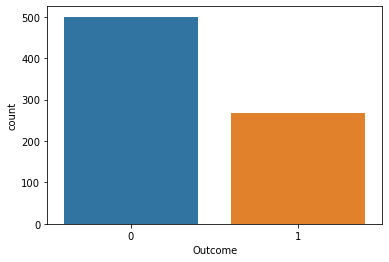

In [9]:
sns.countplot(x  = df['Outcome'])

## Model Training

In [21]:
## train_test_split
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32,stratify=y)

In [22]:
# create instance of model
logistic_model=LogisticRegression()

# Fit Model
logistic_model.fit(x_train,y_train)

LogisticRegression()

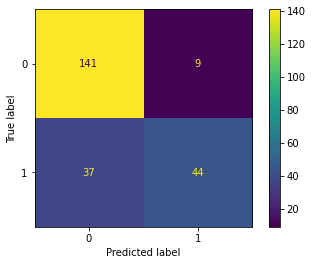

In [23]:
# Testing  Data
plot_confusion_matrix(logistic_model, x_test, y_test)

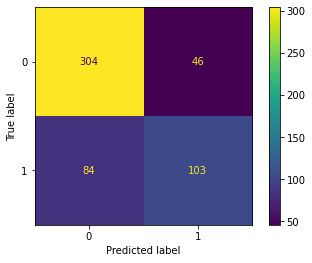

In [24]:
# Training Data
plot_confusion_matrix(logistic_model, x_train, y_train)

## Model Evaluation

In [25]:
## For Testing
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("-"*65)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("-"*65)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[141   9]
 [ 37  44]]
-----------------------------------------------------------------
Accuracy Score: 0.8008658008658008
-----------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       150
           1       0.83      0.54      0.66        81

    accuracy                           0.80       231
   macro avg       0.81      0.74      0.76       231
weighted avg       0.81      0.80      0.79       231



In [26]:
# Training data
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[304  46]
 [ 84 103]]
*********************************************
Accuracy Score: 0.7579143389199255
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.69      0.55      0.61       187

    accuracy                           0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.75      0.76      0.75       537



In [32]:
## we find the prediction probability
y_pred_proba = logistic_model.predict_proba(x_train)
y_pred_proba[:,1]

array([0.27530636, 0.27480414, 0.24373589, 0.1923902 , 0.30969592,
       0.55567356, 0.33625535, 0.19008835, 0.1124684 , 0.08108995,
       0.8688044 , 0.15065462, 0.12649986, 0.55812544, 0.32398507,
       0.77674753, 0.37856701, 0.43791823, 0.44004252, 0.42984443,
       0.77359846, 0.68905187, 0.07743914, 0.68711147, 0.29300393,
       0.09106357, 0.30367308, 0.30496885, 0.57584938, 0.04719266,
       0.09573713, 0.05445558, 0.37122454, 0.74172465, 0.19553   ,
       0.30032804, 0.12835766, 0.07741741, 0.49002838, 0.19946923,
       0.11165911, 0.57717803, 0.05095372, 0.48029657, 0.87680945,
       0.104209  , 0.32039702, 0.79210455, 0.10425637, 0.11334797,
       0.76151728, 0.75485511, 0.07812113, 0.76717393, 0.44695935,
       0.18970838, 0.09444493, 0.42879508, 0.11527281, 0.42282174,
       0.12853793, 0.55874535, 0.62694975, 0.26743518, 0.21894546,
       0.22372925, 0.78198446, 0.4771516 , 0.62410408, 0.74651595,
       0.38390634, 0.10807511, 0.05988661, 0.7714785 , 0.12245

In [33]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.95598625, 0.95598625, 0.9500307 , 0.94924546, 0.92918414,
       0.91611334, 0.87680945, 0.87640044, 0.8688044 , 0.86101869,
       0.81613338, 0.81196148, 0.80117504, 0.79620006, 0.78198446,
       0.77928315, 0.77359846, 0.77243151, 0.7714785 , 0.76717393,
       0.75470016, 0.74892932, 0.74530534, 0.74511138, 0.74172465,
       0.74018852, 0.73514073, 0.73428694, 0.72945307, 0.72210845,
       0.71160272, 0.69191989, 0.68711147, 0.68632994, 0.68535287,
       0.6845407 , 0.67522154, 0.65516535, 0.62694975, 0.62410408,
       0.59169055, 0.5893736 , 0.58311752, 0.58288906, 0.57891714,
       0.57816671, 0.57584938, 0.56802566, 0.56262713, 0.55535745,
       0.54873451, 0.54866916, 0.54297819, 0.53413602, 0.53381421,
       0.5333401 , 0.53069331, 0.53047383, 0.52617156, 0.52405786,
       0.50593908, 0.50487406, 0.49976606, 0.49802639, 0.49409247,
       0.4908175 , 0.49002838, 0.48573941, 0.48564714, 0.48029657,
       0.47831049, 0.4771516 , 0.45972919, 0.45187557, 0.44616

Text(0.5, 1.0, 'Reciever Operating Characteristics')

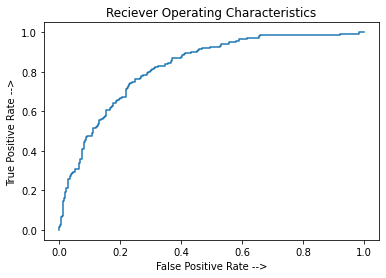

In [34]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Testing on single row

In [36]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [39]:
x_test.loc[1]

Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Name: 1, dtype: float64

In [40]:
Glucose                    = 87.00
BloodPressure             =  70.000
SkinThickness             =  35.000
Insulin                   =  23
BMI                       =  46.600
DiabetesPedigreeFunction  =   0.851
Age                       =  38.000

array=np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
array

array([[87.   , 70.   , 35.   , 23.   , 46.6  ,  0.851, 38.   ]])

In [42]:
predict= logistic_model.predict(array)[0]
predict

0